In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import pickle
import os

Convert Modified Julian Date (MJD) to UTC

In [2]:
from astropy.time import Time
def MJDtoUTC(mjd):
  jd = mjd + 2400000.5 # convert to JD
  t = Time(jd, format='jd')
  utc = t.to_datetime()
  month_year = utc.strftime('%y%m')

  return(month_year)

Optical Clock data found on this website: https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/

In [3]:
it_yb1_url = 'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/it_yb1-ftai'
it_yb1_filename = 'it_yb1'

kriss_yb1_url = 'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/kriss_yb1-ftai'
kriss_yb1_filename = 'kriss_yb1'

nict_sr1_url = 'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/nict_sr1-ftai'
nict_sr1_filename = 'nict_sr1'

nist_yb1_url = 'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/nist_yb1-ftai'
nist_yb1_filename = 'nist_yb1'

nmij_yb1_url = 'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/nmij_yb1-ftai'
nmij_yb1_filename = 'nmij_yb1'

npl_sr1_url = 'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/npl_sr1-ftai'
npl_sr1_filename = 'npl_sr1'

syrte_sr2_url =  'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/syrte_sr2-ftai'
syrte_sr2_filename = 'syrte_sr2'

syrte_srb_url = 'https://webtai.bipm.org/ftp/pub/tai/other-products/taipsfs/syrte_srb-ftai'
syrte_srb_filename = 'syrte_srb'

x = [
    (it_yb1_url, it_yb1_filename),
    (kriss_yb1_url, kriss_yb1_filename),
    (nict_sr1_url, nict_sr1_filename),
    (nist_yb1_url, nist_yb1_filename),
    (nmij_yb1_url, nmij_yb1_filename),
    (npl_sr1_url, npl_sr1_filename),
    (syrte_sr2_url, syrte_sr2_filename),
    (syrte_srb_url, syrte_srb_filename)
]

In [4]:
def run(url,filename):

  urllib.request.urlretrieve(url, filename)

  column_names=['Standard', 'MJD Start', 'MJD End', 'd','uA','uB', 'ul/Lab','ul/Tai','u','uSrep', 'Ref(uB)', 'uB(Ref)', 'Steer', 'Year(uS)', 'YYMM', 'Uptime']
  df = pd.read_csv(filename,skiprows=9, sep='\s+',header=None, names=column_names)

  df.replace('', pd.NA, inplace=True)

  # Multiply specified columns by 10^-15
  columns_to_multiply = ['d','uA', 'uB', 'ul/Lab', 'ul/Tai', 'u', 'uSrep', 'uB(Ref)']
  df[columns_to_multiply] *= 1e-15

  # add columns with the converted MJD to UTC year and month
  df['UTC_Start'] = df['MJD Start'].apply(MJDtoUTC)
  df['UTC_End'] = df['MJD End'].apply(MJDtoUTC)
  df['UTC_Start'] = pd.to_datetime(df['UTC_Start'], format='%y%m')
  df['UTC_End'] = pd.to_datetime(df['UTC_End'], format='%y%m')

  return df

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_111728/2123197762.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(filename,skiprows=9, sep='\s+',header=None, names=column_names)


In [5]:
#df.head()

In [6]:
# create a dictionary for all datasets
optical_clocks_dictionary = {}

for url, filename in x:
    data_frame = run(url, filename)
    optical_clocks_dictionary[filename] = data_frame

In [7]:
# Check what the optical clocks dictionary contains
optical_clocks_dictionary.keys()

dict_keys(['it_yb1', 'kriss_yb1', 'nict_sr1', 'nist_yb1', 'nmij_yb1', 'npl_sr1', 'syrte_sr2', 'syrte_srb'])

In [8]:
# Print one of the dataframes to check
optical_clocks_dictionary['syrte_sr2']

Standard  MJD Start  MJD End             d            uA            uB  \
0  SYRTE-SR2      57539    57554 -1.240000e-15  3.000000e-16  4.000000e-17   
1  SYRTE-Sr2      59384    59394  3.000000e-16  1.000000e-17  3.000000e-17   
2  SYRTE-Sr2      59394    59424  1.000000e-17  1.000000e-17  3.000000e-17   
3  SYRTE-Sr2      59424    59429  8.500000e-16  1.000000e-17  3.000000e-17   
4  SYRTE-Sr2      59639    59669 -3.000000e-16  1.000000e-17  2.000000e-17   
5  SYRTE-Sr2      59669    59674  2.500000e-16  1.000000e-17  2.000000e-17   
6  SYRTE-Sr2      59934    59959 -6.000000e-17  1.000000e-17  4.000000e-17   

         ul/Lab        ul/Tai             u         uSrep Ref(uB)  \
0  1.100000e-16  3.700000e-16  4.900000e-16  5.000000e-16     [2]   
1  9.000000e-17  5.300000e-16  5.300000e-16  4.000000e-16    T350   
2  1.600000e-16  2.000000e-16  2.600000e-16  4.000000e-16    T350   
3  1.200000e-16  9.800000e-16  9.900000e-16  4.000000e-16    T350   
4  1.000000e-16  2.000000e-16  2.200000e-16  4.000000e-16    T350   
5  1.300000e-16  9.800000e-16  9.900000e-16  4.000000e-16    T350   
6  1.800000e-16  2.300000e-16  3.000000e-16  1.900000e-16    T350   

        uB(Ref) Steer  Year(uS)  YYMM  Uptime  UTC_Start    UTC_End  
0  5.000000e-17     N      2015  1702     NaN 2016-05-01 2016-06-01  
1  5.000000e-17     Y      2017  2106    90.2 2021-06-01 2021-06-01  
2  5.000000e-17     Y      2017  2107    56.2 2021-06-01 2021-07-01  
3  5.000000e-17     Y      2017  2108    86.1 2021-07-01 2021-08-01  
4  5.000000e-17     Y      2017  2203    56.9 2022-03-01 2022-03-01  
5  5.000000e-17     Y      2017  2204    73.8 2022-03-01 2022-04-01  
6  5.000000e-17     Y      2021  2301    36.5 2022-12-01 2023-01-01

In [9]:
directory_path = os.getcwd()
filename = 'optical_clocks_keys.pkl'
file_path = os.path.join(directory_path, filename)

with open(file_path, 'wb') as f:
    pickle.dump(optical_clocks_dictionary, f)

In [10]:
# load the dictionary in another file
with open(file_path, 'rb') as f:
    optical_clocks_dict_new = pickle.load(f)

In [11]:
# Check that it is working
print('Optical Clocks Dictionary Keys:', optical_clocks_dict_new.keys())
optical_clocks_dict_new['it_yb1'].head()

Optical Clocks Dictionary Keys: dict_keys(['it_yb1', 'kriss_yb1', 'nict_sr1', 'nist_yb1', 'nmij_yb1', 'npl_sr1', 'syrte_sr2', 'syrte_srb'])


Standard  MJD Start  MJD End             d            uA            uB  \
0   IT-Yb1      58389    58419  1.700000e-16  1.000000e-17  3.000000e-17   
1   IT-Yb1      58419    58434  1.400000e-16  1.000000e-17  3.000000e-17   
2   IT-Yb1      58459    58469 -1.000000e-16  1.000000e-17  3.000000e-17   
3   IT-Yb1      58489    58514  6.500000e-16  1.000000e-17  3.000000e-17   
4   IT-Yb1      58514    58539  7.500000e-16  1.000000e-17  3.000000e-17   

         ul/Lab        ul/Tai             u         uSrep Ref(uB)  \
0  3.200000e-16  2.600000e-16  4.100000e-16  5.000000e-16     [2]   
1  5.700000e-16  4.900000e-16  7.500000e-16  5.000000e-16     [2]   
2  5.900000e-16  7.000000e-16  9.200000e-16  5.000000e-16     [2]   
3  3.900000e-16  3.100000e-16  5.000000e-16  5.000000e-16     [2]   
4  2.600000e-16  3.100000e-16  4.000000e-16  5.000000e-16     [2]   

        uB(Ref) Steer  Year(uS)  YYMM  Uptime  UTC_Start    UTC_End  
0  3.000000e-17     Y      2017  1911     NaN 2018-09-01 2018-10-01  
1  3.000000e-17     Y      2017  1911     NaN 2018-10-01 2018-11-01  
2  3.000000e-17     Y      2017  1911     NaN 2018-12-01 2018-12-01  
3  3.000000e-17     Y      2017  1911     NaN 2019-01-01 2019-01-01  
4  3.000000e-17     Y      2017  1911     NaN 2019-01-01 2019-02-01

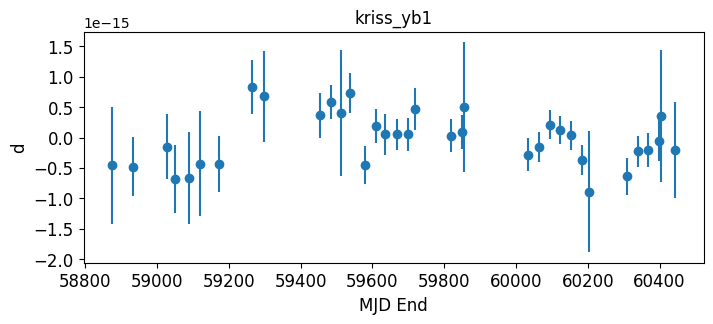

In [12]:
## Sample plot
plt.figure(figsize=(8, 3))
plt.errorbar(optical_clocks_dict_new['kriss_yb1']['MJD End'], optical_clocks_dict_new['kriss_yb1']['d'], yerr = optical_clocks_dict_new['kriss_yb1']['u'], fmt='o')

plt.title('kriss_yb1',  fontsize=12)
plt.xlabel('MJD End',  fontsize=12)
plt.ylabel('d',  fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

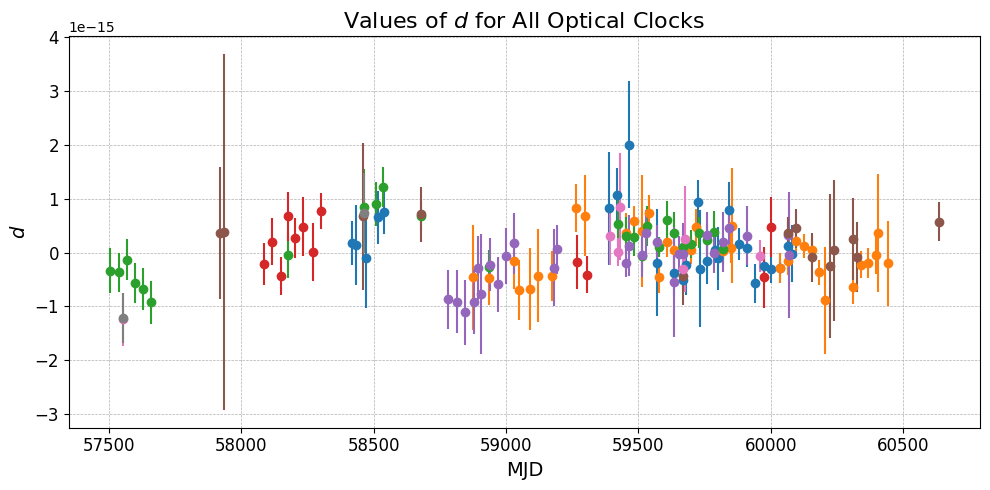

In [13]:
## Plot ofthe d values against MJD for all optical clocks

plt.figure(figsize=(10, 5))
for key, df in optical_clocks_dict_new.items():
    plt.errorbar(df['MJD End'], df['d'], yerr=df['u'],fmt='o', label=key)

plt.title('Values of $d$ for All Optical Clocks', fontsize=16)
plt.xlabel('MJD', fontsize=14)
plt.ylabel('$d$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

#plt.savefig('optical_clocks_figure.pdf', transparent=True, bbox_inches='tight')

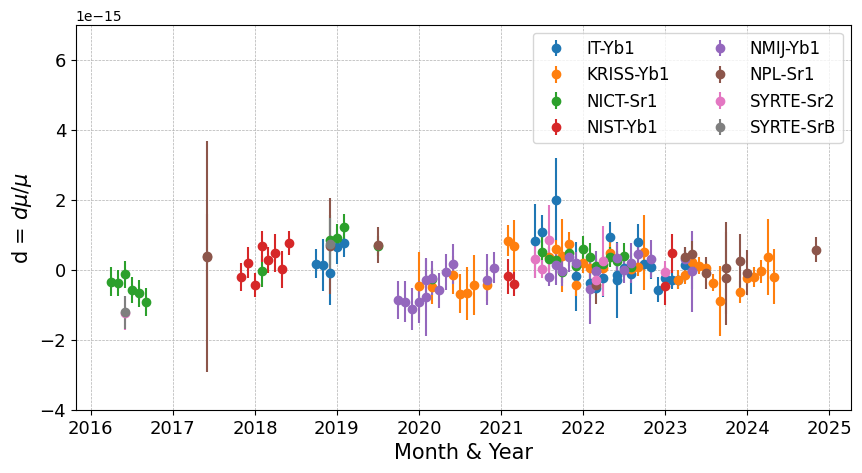

In [18]:
plt.figure(figsize=(10, 5))
new_labels = {
    "it_yb1": "IT-Yb1",
    "kriss_yb1": "KRISS-Yb1",
    "nict_sr1": "NICT-Sr1",
    "nist_yb1": "NIST-Yb1",
    "nmij_yb1": "NMIJ-Yb1",
    "npl_sr1": "NPL-Sr1",
    "syrte_sr2": "SYRTE-Sr2",
    "syrte_srb": "SYRTE-SrB"
}

# Update dictionary keys with new labels
optical_clocks_dictionary_renamed = {new_labels[k]: v for k, v in optical_clocks_dict_new.items()}


for key, df in optical_clocks_dictionary_renamed.items():
    plt.errorbar(df['UTC_End'], (df['d']), yerr=df['u'],fmt='o', label=key)

#plt.title('Values of d for all Optical Clocks', fontsize=12)
plt.xlabel('Month & Year', fontsize=15)
plt.ylabel(r'd = $d \mu / \mu$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize = 12, ncol =2)
plt.ylim(-4*1e-15,7*1e-15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


#plt.grid(linewidth=0.2)
plt.savefig('dvalues.pdf',  bbox_inches='tight')

repo_path = "../../figures/"
plt.savefig(os.path.join(repo_path, "dvalues.pdf"), bbox_inches='tight')

plt.show()